# This notebook demostrates building a sample neural network for to solve a binary class prediction problem using Keras

In this tutorial you will learn 6 major steps involved in building a neural network using Keras 
1. Load the Data
2. Define the model
3. Compile the model
4. Fit Model
5. Evaluate Model
6. Predict

## 1. Load the Data

Whenever we work with machine learning algorithms that use a stochastic process (e.g. random numbers), it is a good idea to set the random number seed.

This is so that you can run the same code again and again and get the same result. This is useful if you need to demonstrate a result, compare algorithms using the same source of randomness or to debug a part of your code.

You can initialize the random number generator with any seed you like, for example:

In [16]:
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


Now we can load our data.

In this tutorial, we are going to use the Pima Indians onset of diabetes dataset. This is a standard machine learning dataset from the UCI Machine Learning repository. It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.

As such, it is a binary classification problem (onset of diabetes as 1 or not as 0). All of the input variables that describe each patient are numerical. This makes it easy to use directly with neural networks that expect numerical input and output values, and ideal for our first neural network in Keras.

<a href = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"> Dataset File </a>


<a href = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names"> Dataset Details </a>

Download the dataset and place it in your local working directory, the same as your python file. Save it with the file name.

In [17]:
# load pima indians dataset
dataset = pd.read_csv("pima-indians-diabetes.data.csv", delimiter=",", header=None)
dataset_train, dataset_test = model_selection.train_test_split(dataset)
# split into input (X) and output (Y) variables
X_train, X_val = dataset_train.loc[:,:7], dataset_test.loc[:,:7]
Y_train, Y_val = dataset_train.loc[:,[8]], dataset_test.loc[:,[8]]

<a href = 'https://machinelearningmastery.com/index-slice-reshape-numpy-arrays-machine-learning-python/'> How to Index, Slice and Reshape NumPy Arrays for Machine Learning in Python </a>

In [18]:
scaling = preprocessing.StandardScaler()
scaling.fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_val_scaled = scaling.transform(X_test)

## 2. Define the Model

Models in Keras are defined as a sequence of layers.

We create a Sequential model and add layers one at a time until we are happy with our network topology.

The first thing to get right is to ensure the input layer has the right number of inputs. This can be specified when creating the first layer with the input_dim argument and setting it to 8 for the 8 input variables.

How do we know the number of layers and their types?

This is a very hard question. There are heuristics that we can use and often the best network structure is found through a process of trial and error experimentation. Generally, you need a network large enough to capture the structure of the problem if that helps at all.

In this example, we will use a fully-connected network structure with three layers.

Fully connected layers are defined using the Dense class. We can specify the number of neurons in the layer as the first argument, the initialization method as the second argument as init and specify the activation function using the activation argument.

In this case, we initialize the network weights to a small random number generated from a uniform distribution (‘uniform‘), in this case between 0 and 0.05 because that is the default uniform weight initialization in Keras. Another traditional alternative would be ‘normal’ for small random numbers generated from a Gaussian distribution.

We will use the rectifier (‘relu‘) activation function on the first two layers and the sigmoid function in the output layer. It used to be the case that sigmoid and tanh activation functions were preferred for all layers. These days, better performance is achieved using the rectifier activation function. We use a sigmoid on the output layer to ensure our network output is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.

We can piece it all together by adding each layer. The first layer has 12 neurons and expects 8 input variables. The second hidden layer has 8 neurons and finally, the output layer has 1 neuron to predict the class (onset of diabetes or not).

In [19]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))


## 3. Compile the model

Now that the model is defined, we can compile it.

Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to make predictions for this problem.

We must specify the loss function to use to evaluate a set of weights, the optimizer used to search through different weights for the network and any optional metrics we would like to collect and report during training.

In this case, we will use logarithmic loss, which for a binary classification problem is defined in Keras as “binary_crossentropy“. We will also use the efficient gradient descent algorithm “adam” for no other reason that it is an efficient default. Learn more about the Adam optimization algorithm in the paper “Adam: A Method for Stochastic Optimization“.

Finally, because it is a classification problem, we will collect and report the classification accuracy as the metric.

In [20]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


## 4. Fit the Model

We have defined our model and compiled it ready for efficient computation.

Now it is time to execute the model on some data.

We can train or fit our model on our loaded data by calling the fit() function on the model.

The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the nepochs argument. We can also set the number of instances that are evaluated before a weight update in the network is performed, called the batch size and set using the batch_size argument.

For this problem, we will run for a small number of iterations (150) and use a relatively small batch size of 10. Again, these can be chosen experimentally by trial and error.

In [21]:
# Fit the model
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(X_train_scaled, Y_train, epochs=10000, batch_size=300,  verbose=0, validation_data=(X_val_scaled,Y_val), callbacks=[early_stopping])


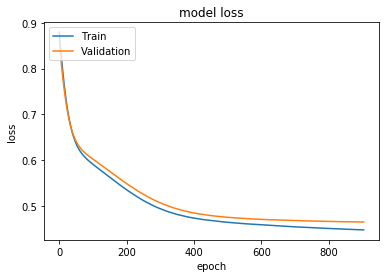

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## 5. Evaluate the Model

We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset.

This will only give us an idea of how well we have modeled the dataset (e.g. train accuracy), but no idea of how well the algorithm might perform on new data. We have done this for simplicity, but ideally, you could separate your data into train and test datasets for training and evaluation of your model.

You can evaluate your model on your training dataset using the evaluate() function on your model and pass it the same input and output used to train the model.

This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy.

In [23]:
scores = model.evaluate(X_test_scaled, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

192/192 [==============================] - 0s 33us/step

acc: 78.12%


## 6. Make predictions

Making predictions is as easy as calling model.predict(). We are using a sigmoid activation function on the output layer, so the predictions will be in the range between 0 and 1. We can easily convert them into a crisp binary prediction for this classification task by rounding them.

In [24]:
# calculate predictions
predictions = model.predict(X_val_scaled)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]


In [25]:
confusion_matrix(Y_val,rounded)

array([[107,  15],
       [ 27,  43]])